# Week4 - Homework

- Execute the below code, then answer the numbered questions.
- You can create additinal code and markdown blocks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/airbnb_nyc_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Question 1:
### Which features can we use?

In [3]:
# analysis code
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
rentals = df.copy()
rentals.drop(['id', 'name', 'host_id', 'host_name'], axis=1, inplace=True)
rentals.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


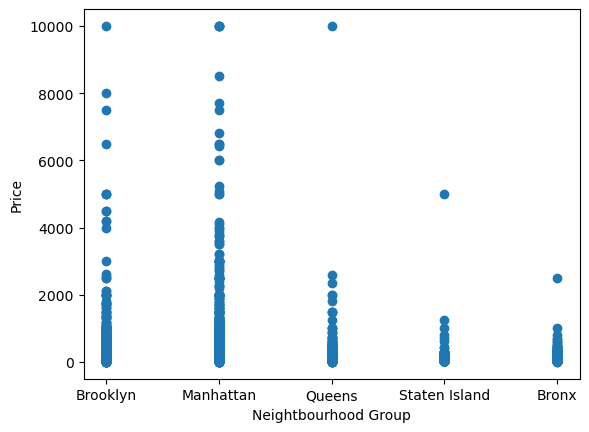

In [5]:
plt.scatter(rentals.neighbourhood_group, rentals.price)
plt.xlabel('Neightbourhood Group')
plt.ylabel('Price')
plt.show()

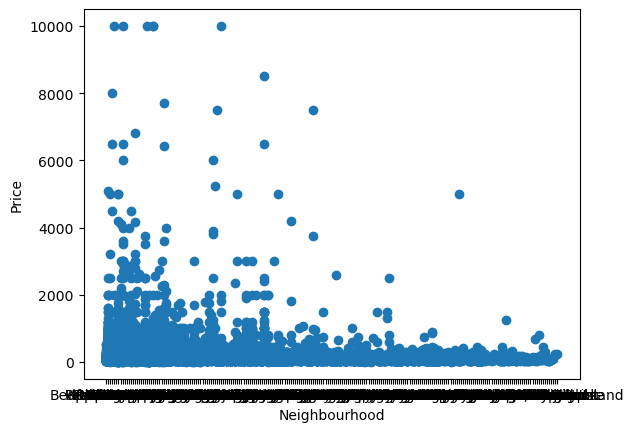

In [6]:
plt.scatter(rentals.neighbourhood, rentals.price)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.show()

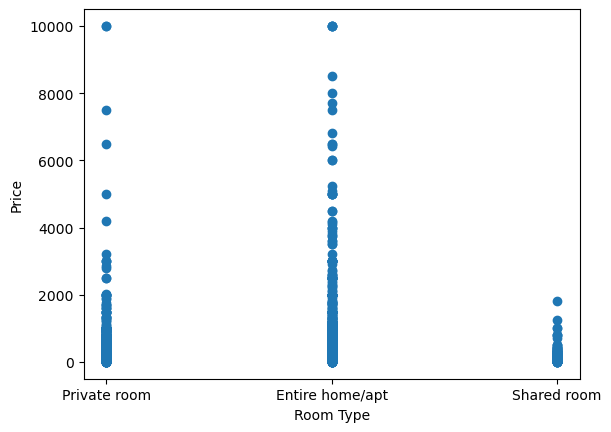

In [7]:
plt.scatter(rentals.room_type, rentals.price)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

There is some separation within neighbourhood group and room type

In [8]:
numeric = rentals.copy()
numeric.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis=1, inplace=True)
numeric.head(5)

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365
1,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,NaN,1,365
3,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194
4,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0


In [9]:
#Transform dataset: add new column that calculates time elapsed since last review
numeric.last_review = pd.to_datetime(numeric.last_review)

def calculateTimeElapsed(initDate):
    elapsedTime = datetime.now() - initDate
    return elapsedTime.days

numeric['days_since_last_review'] = numeric['last_review'].apply(calculateTimeElapsed)
numeric.drop(['last_review'], axis=1, inplace=True)

<Axes: >

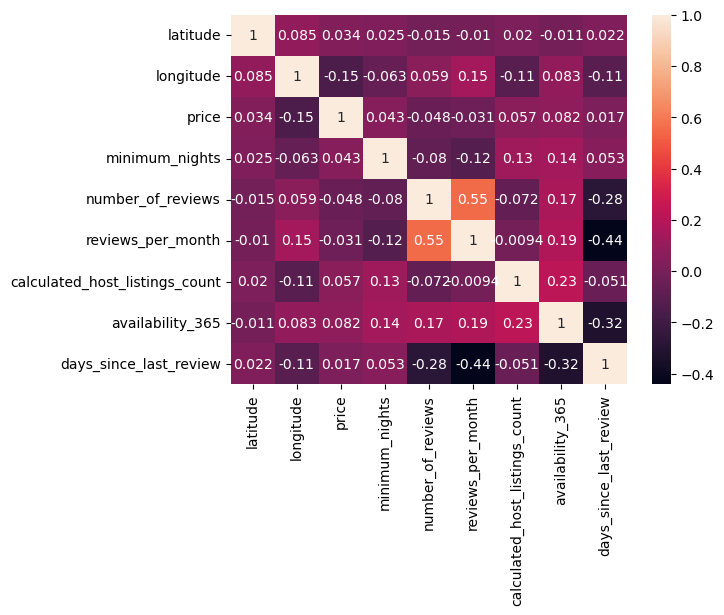

In [10]:
sns.heatmap(numeric.corr(), annot=True)

The three features that seem usable from the EDA are longitude, neighbourhood group, and room type. This was shown in the scatterplots above, as well as the slight negative correlation from the heatmap shown above.

In [11]:
features = [
    # enter features you selected
    'neighbourhood_group',
    'room_type',
    'longitude'
]

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 39,116
Records in test data: 9,779

Features:
neighbourhood_group
room_type
longitude


## Question 2: 
Split the features into two lists, one for the numerical features and another for the categorical features.

In [12]:
# insert code here
num_features_train = X_train[['longitude']]
cat_features_train = X_train[['neighbourhood_group', 'room_type']]
num_features_test = X_test[['longitude']]
cat_features_test = X_test[['neighbourhood_group', 'room_type']]

## Question 3: 
 Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [13]:
# insert code here
print(num_features_train.isna().sum())
print(num_features_test.isna().sum())

longitude    0
dtype: int64
longitude    0
dtype: int64


There are no missing values to replace

In [14]:
scaler = StandardScaler()
scaler.fit(num_features_train)
scaler.transform(num_features_train)

num_pipeline = Pipeline([
    ('scaling', StandardScaler())
])

In [15]:
num_pipeline

Pipeline(steps=[('scaling', StandardScaler())])

## Question 4: 
Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [16]:
# insert code here
encoder = OneHotEncoder(drop='first')
encoded = encoder.fit_transform(cat_features_train)
encoded_df = pd.DataFrame(
    data=encoded.todense(), 
    columns=encoder.get_feature_names_out()
)
encoded_df.head()

,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
cat_vars = ['neighbourhood_group', 'room_type']

cat_pipeline = Pipeline([
    ('create_dummy_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

processing_pipeline = ColumnTransformer(transformers=[
    ('cat pipeline', cat_pipeline, cat_vars),
])

processing_pipeline.fit(X_train)
transformed = processing_pipeline.transform(X_train)
missing_values = pd.DataFrame(transformed).isna().sum().sum()
print(f'Number of missing values: {missing_values}')
print(f'Shape of data: {transformed.shape}')

Number of missing values: 0
Shape of data: (39116, 6)


In [18]:
cat_pipeline

Pipeline(steps=[('create_dummy_cats',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

## Question 5: 

Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [19]:
# insert code here
cat_vars = ['neighbourhood_group', 'room_type']
num_vars = ['longitude']

cat_pipeline = Pipeline([
    ('cat_var_dummy', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

num_pipeline = Pipeline([
    ('scaling', StandardScaler())
])

processing_pipeline = ColumnTransformer(transformers=[
    ('cat pipeline', cat_pipeline, cat_vars),
    ('num pipeline', num_pipeline, num_vars)
])

processing_pipeline.fit(X_train)
transformed = processing_pipeline.transform(X_train)
missing_values = pd.DataFrame(transformed).isna().sum().sum()
print(f'Number of missing values: {missing_values}')
print(f'Shape of data: {transformed.shape}')
print(f'Shape of endcoded data, without numerical column: {encoded_df.shape}')

Number of missing values: 0
Shape of data: (39116, 7)
Shape of endcoded data, without numerical column: (39116, 6)


Since the encoded dataset (containing only categorical variables) has 6 columns and the shape of the data (including all categorical variables and one numerical variable) has 7 columns, the training dataset is correct

## Question 6: 

Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [20]:
modeling_pipeline = Pipeline([
    ('data processing', processing_pipeline),
    ('lm', LinearRegression())
])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data processing',
                 ColumnTransformer(transformers=[('cat pipeline',
                                                  Pipeline(steps=[('cat_var_dummy',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['neighbourhood_group',
                                                   'room_type']),
                                                 ('num pipeline',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['longitude'])])),
                ('lm', LinearRegression())])

In [21]:
price_predictions = modeling_pipeline.predict(X_test)

In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, price_predictions)
print(f'R-Squared Score: {r2}')

R-Squared Score: 0.07927100600558712


## Question 7: 

Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

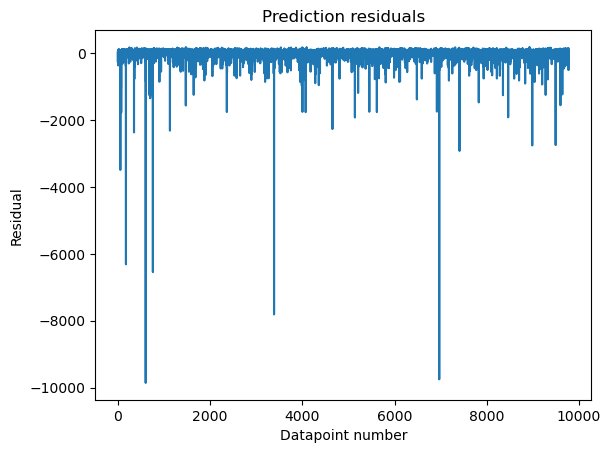

In [23]:
# insert code here
res = (price_predictions-y_test).values
plt.plot(res)
plt.title('Prediction residuals')
plt.xlabel('Datapoint number')
plt.ylabel('Residual')
plt.show()

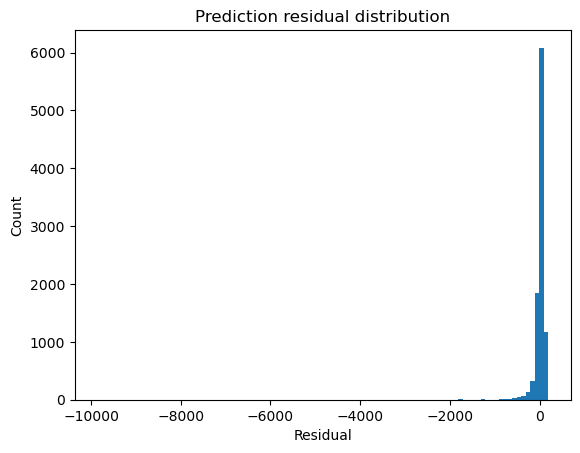

In [24]:
plt.hist(res, bins=100)
plt.title('Prediction residual distribution')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

From the residual plots, it seems that the R2 score is being heavily impacted by a relatively small number of datapoints that have a large residual value

## Question 8: 

Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [25]:
from sklearn.linear_model import Ridge

modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=100))])
modeling_pipeline_ridge.fit(X_train, y_train)

price_predictions_ridge = modeling_pipeline_ridge.predict(X_test)
r2_ridge = r2_score(y_test, price_predictions_ridge)
print(f'R-Squared Score: {r2_ridge}')

R-Squared Score: 0.07893211106526932


This acutally lowered the R2 score. This is probably because there were not that many features to begin with in the model.